# Descritores de Áudio

## Objetivos
Ao fim desta unidade, o aluno deverá ser capaz de escolher adequadamente descritores de áudio que possam fornecer informações relevantes para a detecção de características sonoras.

## Pré-requisitos
Antes de iniciar esta unidade, o aluno deve sentir-se confortável com as seguintes frases:

1. É possível, através da visualização de um espectrograma, determinar algumas características auditivas de sinais de áudio
1. Essas características auditivas podem se correlacionar com descrições semânticas do conteúdo desse mesmo sinal, tal como "qual é o instrumento que está tocando"

## Forma e Conteúdo Espectral

Toda a discussão que se segue parte do pressuposto de que o espectro de um quadro de áudio descreve algum tipo de forma. A forma do espectro de uma série harmônica, por exemplo, pode ser descrita como um conjunto de valores baixos, contrastanto com valores altos em frequências presentes na série harmônica. O espectro de um impulso, em contraste, possui uma forma mais plana, já que o conteúdo energético está disperso por todas as frequências presentes.

Ao visualizar um espectrograma, estamos visualizando um conjunto de formas espectrais. Portanto, se encontrarmos formas numéricas, objetivas, de descrever essas formas espectrais, estaremos também descrevendo numericamente o conteúdo que pode ser visualizado à partir de um espectrograma. Assim, nesta interação, avaliaremos como os descritores de forma espectral estão relacionados ao conteúdo auditivo.

### Centróide Espectral

O centróide de uma forma geométrica indica o seu ponto de equilíbrio (assumindo densidade constante). Também, é um ponto que minimiza a soma das distâncias euclidianas (ponderadas pela magnitude) em relação a todos os outros pontos da forma abordada.  Se a forma é limitada por uma função $y[k] = f(k)$, então seu centróide pode ser calculado por:
$$\frac{\sum_{k=0}^{K-1} ky[k]}{\sum_{k=0}^{K-1}y[k]}.$$

Sob um ponto de vista perceptual, o centróide se correlaciona a uma propriedade chamada *brilho* (*brightness*). Um som muito brilhante é também entendido como "estridente", ao passo que um som mais opaco (menos brilhante) pode ser também descrito como "fechado". Nos exemplos que seguem, analisaremos os centróides de uma sequência de percussão, de uma guitarra tocando *blues* e de um coral de igreja.

In [47]:
%matplotlib inline
import numpy as np
import scipy.io.wavfile
import matplotlib.pyplot as plt
import IPython.lib.display as display 

import mir3.modules.tool.wav2spectrogram as spec

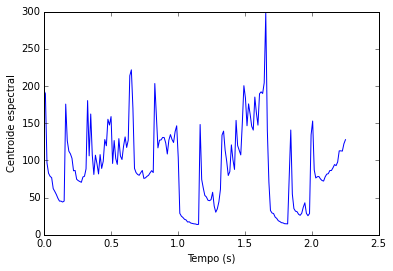

In [48]:
import mir3.modules.features.centroid as cent

fname = 'audio/tabla.wav'
wav2spec = spec.Wav2Spectrogram() # Objeto que converte arquivos wav para espectrogramas
s = wav2spec.convert(open(fname, 'rb'), window_length=1024, window_step=512, spectrum_type='magnitude')

centr = cent.Centroid()
centroid = centr.calc_track(s)
T = centroid.metadata.sampling_configuration.ofs

t = np.linspace(0, len(centroid.data)/T, len(centroid.data))

plt.plot(t, centroid.data)
plt.xlabel('Tempo (s)')
plt.ylabel('Centroide espectral')
plt.show()

display.Audio(fname)

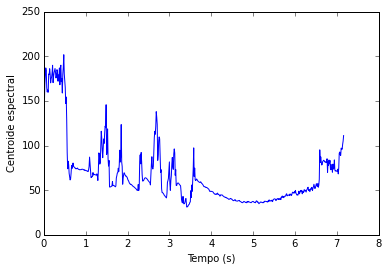

In [49]:
fname = 'audio/bbking.wav'
wav2spec = spec.Wav2Spectrogram() # Objeto que converte arquivos wav para espectrogramas
s = wav2spec.convert(open(fname, 'rb'), window_length=1024, window_step=512, spectrum_type='magnitude')

centr = cent.Centroid()
centroid = centr.calc_track(s)
T = centroid.metadata.sampling_configuration.ofs

t = np.linspace(0, len(centroid.data)/T, len(centroid.data))

plt.plot(t, centroid.data)
plt.xlabel('Tempo (s)')
plt.ylabel('Centroide espectral')
plt.show()

display.Audio(fname)

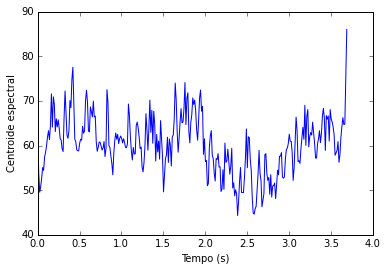

In [50]:
fname = 'audio/chorus.wav'
wav2spec = spec.Wav2Spectrogram() # Objeto que converte arquivos wav para espectrogramas
s = wav2spec.convert(open(fname, 'rb'), window_length=1024, window_step=512, spectrum_type='magnitude')

centr = cent.Centroid()
centroid = centr.calc_track(s)
T = centroid.metadata.sampling_configuration.ofs

t = np.linspace(0, len(centroid.data)/T, len(centroid.data))

plt.plot(t, centroid.data)
plt.xlabel('Tempo (s)')
plt.ylabel('Centroide espectral')
plt.show()

display.Audio(fname)

Podemos perceber que os centróides têm valores baixos em intervalos de tempo correspondentes a sons harmônicos, ao passo que aumentam quando há ruído ambiente ou ataques percussivos. Logo, um arquivo de áudio com muitos ataques tenderá a ter picos de centróides em frequências mais altas. Ao mesmo tempo, verificamos que a o centróide, no coral, tende a permanecer em valores mais altos que o centróide da guitarra.

### Roll-off Espectral
Roll-Off é o nome que se dá à frequência abaixo da qual se concentra mais de 95% da energia de um espectro. Esse número, 95%, depende da quantidade de ruído esperada em um sinal. Em verdade, espera-se que todo o conteúdo energético acima do roll-off se relacione somente a ruído.

Repetiremos os mesmos experimentos do centróide, mas também para o Roll-Off.


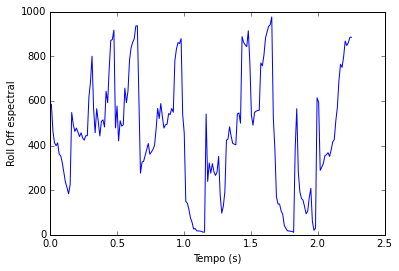

In [51]:
import mir3.modules.features.rolloff as roll

fname = 'audio/tabla.wav'
wav2spec = spec.Wav2Spectrogram() # Objeto que converte arquivos wav para espectrogramas
s = wav2spec.convert(open(fname, 'rb'), window_length=1024, window_step=512, spectrum_type='magnitude')

roff = roll.Rolloff()
roll_off = roff.calc_track(s)
T = roll_off.metadata.sampling_configuration.ofs

t = np.linspace(0, len(roll_off.data)/T, len(roll_off.data))

plt.plot(t, roll_off.data)
plt.xlabel('Tempo (s)')
plt.ylabel('Roll Off espectral')
plt.show()

display.Audio(fname)

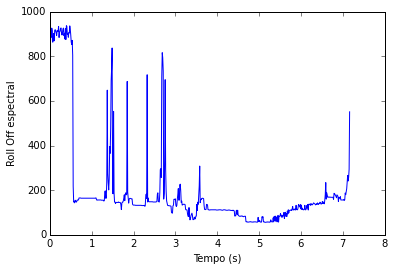

In [52]:
fname = 'audio/bbking.wav'
wav2spec = spec.Wav2Spectrogram() # Objeto que converte arquivos wav para espectrogramas
s = wav2spec.convert(open(fname, 'rb'), window_length=1024, window_step=512, spectrum_type='magnitude')

roff = roll.Rolloff()
roll_off = roff.calc_track(s)
T = roll_off.metadata.sampling_configuration.ofs

t = np.linspace(0, len(roll_off.data)/T, len(roll_off.data))

plt.plot(t, roll_off.data)
plt.xlabel('Tempo (s)')
plt.ylabel('Roll Off espectral')
plt.show()

display.Audio(fname)

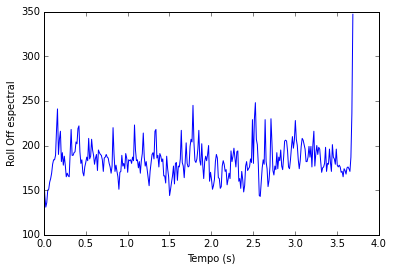

In [53]:
fname = 'audio/chorus.wav'
wav2spec = spec.Wav2Spectrogram() # Objeto que converte arquivos wav para espectrogramas
s = wav2spec.convert(open(fname, 'rb'), window_length=1024, window_step=512, spectrum_type='magnitude')

roff = roll.Rolloff()
roll_off = roff.calc_track(s)
T = roll_off.metadata.sampling_configuration.ofs

t = np.linspace(0, len(roll_off.data)/T, len(roll_off.data))

plt.plot(t, roll_off.data)
plt.xlabel('Tempo (s)')
plt.ylabel('Roll Off espectral')
plt.show()

display.Audio(fname)

É interessante perceber como também o roll-off se relaciona a eventos percussivos. No caso do coral, o rolloff permanece em valores muito baixos. Na guitarra, indica inícios de notas e, novamente, na percussão, se relaciona a eventos percussivos.

### Spectral Flatness
Espectros planos são geralmente relacionados a eventos percussivos e a ruído branco. O spectral flatness é calculado normalizando o espectro para que possa ser considerado um histograma de probabilidades (isto é, com soma unitária) e então estimando a entropia de Shannon desse histograma. Um espectro plano tem flatness igual a 1 e um espectro com apenas um componente diferente de zero tem flatness igual a zero.



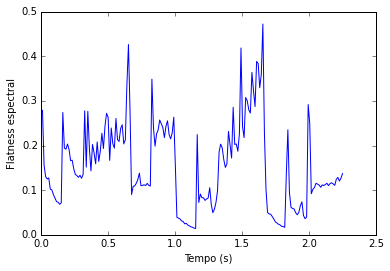

In [54]:
import mir3.modules.features.flatness as flat

fname = 'audio/tabla.wav'
wav2spec = spec.Wav2Spectrogram() # Objeto que converte arquivos wav para espectrogramas
s = wav2spec.convert(open(fname, 'rb'), window_length=1024, window_step=512, spectrum_type='magnitude')

fness = flat.Flatness()
flatness = fness.calc_track(s)
T = flatness.metadata.sampling_configuration.ofs

t = np.linspace(0, len(flatness.data)/T, len(flatness.data))

plt.plot(t, flatness.data)
plt.xlabel('Tempo (s)')
plt.ylabel('Flatness espectral')
plt.show()

display.Audio(fname)

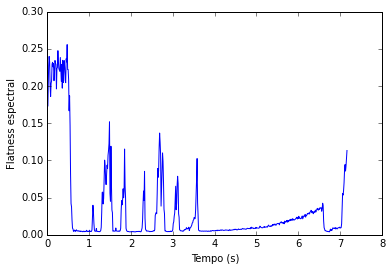

In [55]:
fname = 'audio/bbking.wav'
wav2spec = spec.Wav2Spectrogram() # Objeto que converte arquivos wav para espectrogramas
s = wav2spec.convert(open(fname, 'rb'), window_length=1024, window_step=512, spectrum_type='magnitude')

fness = flat.Flatness()
flatness = fness.calc_track(s)
T = flatness.metadata.sampling_configuration.ofs

t = np.linspace(0, len(flatness.data)/T, len(flatness.data))

plt.plot(t, flatness.data)
plt.xlabel('Tempo (s)')
plt.ylabel('Flatness espectral')
plt.show()

display.Audio(fname)

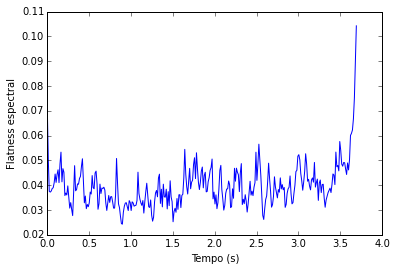

In [56]:
fname = 'audio/chorus.wav'
wav2spec = spec.Wav2Spectrogram() # Objeto que converte arquivos wav para espectrogramas
s = wav2spec.convert(open(fname, 'rb'), window_length=1024, window_step=512, spectrum_type='magnitude')

fness = flat.Flatness()
flatness = fness.calc_track(s)
T = flatness.metadata.sampling_configuration.ofs

t = np.linspace(0, len(flatness.data)/T, len(flatness.data))

plt.plot(t, flatness.data)
plt.xlabel('Tempo (s)')
plt.ylabel('Flatness espectral')
plt.show()

display.Audio(fname)

Estes gráficos mostram que o flatness atinge valores altos para sequências percussivas, oscila entre valores altos e baixos na guitarra e permanece muito baixo para o coral. De fato, sons mais harmônicos têm uma grande tendência a apresentarem muitos picos no espectro - e, portanto, flatness baixo - enquanto sons percussivos ou ruidosos apresentam espectros mais planos.

### Energia
A energia é simplesmente a soma dos elementos de um quadro do espectrograma, elevados ao quadrado. Trata-se de um valor que é alto quando um som é perceptualmente intenso, e baixo em sons pouco intensos. Assim, temos:

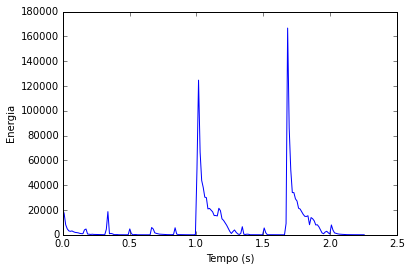

In [57]:
import mir3.modules.features.energy as energ

fname = 'audio/tabla.wav'
wav2spec = spec.Wav2Spectrogram() # Objeto que converte arquivos wav para espectrogramas
s = wav2spec.convert(open(fname, 'rb'), window_length=1024, window_step=512, spectrum_type='magnitude')

en = energ.Energy()
energy = en.calc_track(s)
T = energy.metadata.sampling_configuration.ofs

t = np.linspace(0, len(energy.data)/T, len(energy.data))

plt.plot(t, energy.data)
plt.xlabel('Tempo (s)')
plt.ylabel('Energia')
plt.show()

display.Audio(fname)

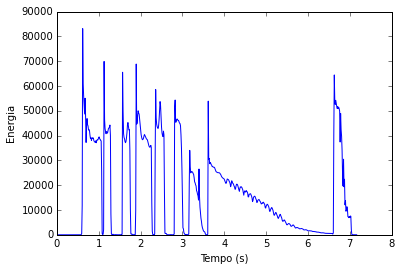

In [58]:
fname = 'audio/bbking.wav'
wav2spec = spec.Wav2Spectrogram() # Objeto que converte arquivos wav para espectrogramas
s = wav2spec.convert(open(fname, 'rb'), window_length=1024, window_step=512, spectrum_type='magnitude')

en = energ.Energy()
energy = en.calc_track(s)
T = energy.metadata.sampling_configuration.ofs

t = np.linspace(0, len(energy.data)/T, len(energy.data))

plt.plot(t, energy.data)
plt.xlabel('Tempo (s)')
plt.ylabel('Energia')
plt.show()

display.Audio(fname)

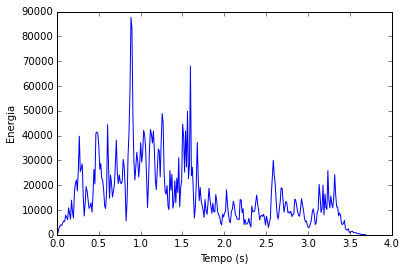

In [59]:
fname = 'audio/chorus.wav'
wav2spec = spec.Wav2Spectrogram() # Objeto que converte arquivos wav para espectrogramas
s = wav2spec.convert(open(fname, 'rb'), window_length=1024, window_step=512, spectrum_type='magnitude')

en = energ.Energy()
energy = en.calc_track(s)
T = energy.metadata.sampling_configuration.ofs

t = np.linspace(0, len(energy.data)/T, len(energy.data))

plt.plot(t, energy.data)
plt.xlabel('Tempo (s)')
plt.ylabel('Energia')
plt.show()

display.Audio(fname)

Não surpreendentemente, a sequência de percussão apresenta grandes e bruscas variações na energia, ao passo que o coral é bem mais estável em relação à energia e, por sua vez, a guitarra tem um comportamento intermediário entre esses dois.

### Fluxo espectral
O fluxo espectral não é propriamente um descritor de forma local do espectro. Trata-se de uma quantificação do quanto o espectro de um quadro varia em relação ao anterior, considerando apenas os acréscimos de magnitude, ou:
$$f_q = \sum_{k=0}^{N-1} \max(X_q[k] - X_{q-1}[k], 0).$$

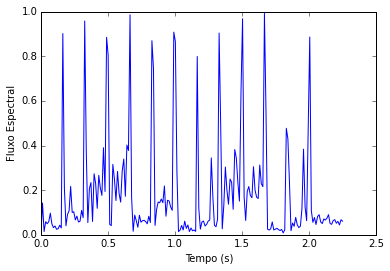

In [60]:
import mir3.modules.features.flux as specfl

fname = 'audio/tabla.wav'
wav2spec = spec.Wav2Spectrogram() # Objeto que converte arquivos wav para espectrogramas
s = wav2spec.convert(open(fname, 'rb'), window_length=1024, window_step=512, spectrum_type='magnitude')

fl = specfl.Flux()
flux = fl.calc_track(s)
T = flux.metadata.sampling_configuration.ofs

t = np.linspace(0, len(flux.data)/T, len(flux.data))

plt.plot(t, flux.data)
plt.xlabel('Tempo (s)')
plt.ylabel('Fluxo Espectral')
plt.show()

display.Audio(fname)

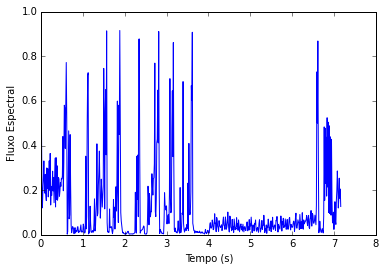

In [61]:
fname = 'audio/bbking.wav'
wav2spec = spec.Wav2Spectrogram() # Objeto que converte arquivos wav para espectrogramas
s = wav2spec.convert(open(fname, 'rb'), window_length=1024, window_step=512, spectrum_type='magnitude')

fl = specfl.Flux()
flux = fl.calc_track(s)
T = flux.metadata.sampling_configuration.ofs

t = np.linspace(0, len(flux.data)/T, len(flux.data))

plt.plot(t, flux.data)
plt.xlabel('Tempo (s)')
plt.ylabel('Fluxo Espectral')
plt.show()

display.Audio(fname)

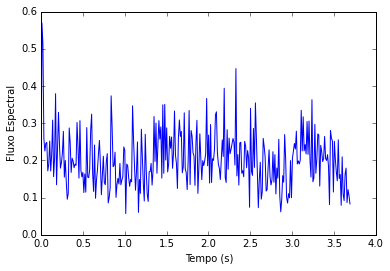

In [62]:
fname = 'audio/chorus.wav'
wav2spec = spec.Wav2Spectrogram() # Objeto que converte arquivos wav para espectrogramas
s = wav2spec.convert(open(fname, 'rb'), window_length=1024, window_step=512, spectrum_type='magnitude')

fl = specfl.Flux()
flux = fl.calc_track(s)
T = flux.metadata.sampling_configuration.ofs

t = np.linspace(0, len(flux.data)/T, len(flux.data))

plt.plot(t, flux.data)
plt.xlabel('Tempo (s)')
plt.ylabel('Fluxo Espectral')
plt.show()

display.Audio(fname)

Podemos verificar que o fluxo espectral marca fortemente as percussões da tabla. Também, vemos que as notas da guitarra são destacadas. Por fim, o coral tem um fluxo espectral que se parece com uma faixa de ruído branco - não é possível ver muitas informações se sobressaltarem no gráfico. Apesar disso, esse fluxo permanece em valores mais altos (0.2) que o da guitarra ao toca a nota longa (0.05)

# Exercícios
1. Os descritores de centróide espectral e roll-off espectral, neste exercício, estão expressos em unidades de frequência discreta (ou seja, como índices $k$ de $X[k]$). Modifique os códigos para que esses descritores passem as ser mostrados em Hertz.
1. Modifique os códigos acima para que a energia seja mostrada em escala logaritmica. Alhuma informação nova foi mostrada?
1. Crie um código para extrair e mostrar descritores de áudio do arquivo "audio/testing.wav" e decida, sem ouvi-lo, que tipo de conteúdo ele tem. Justifique sua resposta com base em gráficos. Depois, ouça o arquivo e verifique sua resposta.

In [63]:
fname = 'audio/testing.wav'
wav2spec = spec.Wav2Spectrogram() # Objeto que converte arquivos wav para espectrogramas
s = wav2spec.convert(open(fname, 'rb'), window_length=1024, window_step=512, spectrum_type='magnitude')